In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [149]:
# import matplotlib

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
# import pandas
import pandas as pd

In [ ]:
start_date = datetime.strptime('06/01/2017', '%m/%d/%Y')
end_date = datetime.strptime('06/30/2017', '%m/%d/%Y')
dt_dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates]

In [32]:
# Import Datetime
from datetime import timedelta
from datetime import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [23]:
days_in_june = dt.date(2017, 6, 30) - dt.timedelta(days=29)
days_in_june



datetime.date(2017, 6, 1)

In [14]:
June_end = dt.date(2017, 6, 30)

June_start = dt.date(2017, 6, 1)

In [30]:
# session.query(Measurement.tobs)
# session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= June).all()

In [26]:
June_temps = []

session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= June_start, Measurement.date <= June_end).all()

[('2017-06-01', 79.0),
 ('2017-06-02', 79.0),
 ('2017-06-03', 79.0),
 ('2017-06-04', 79.0),
 ('2017-06-05', 80.0),
 ('2017-06-06', 79.0),
 ('2017-06-07', 79.0),
 ('2017-06-08', 80.0),
 ('2017-06-09', 80.0),
 ('2017-06-10', 77.0),
 ('2017-06-11', 79.0),
 ('2017-06-12', 83.0),
 ('2017-06-13', 80.0),
 ('2017-06-14', 80.0),
 ('2017-06-15', 78.0),
 ('2017-06-16', 79.0),
 ('2017-06-17', 80.0),
 ('2017-06-18', 77.0),
 ('2017-06-19', 80.0),
 ('2017-06-20', 78.0),
 ('2017-06-21', 79.0),
 ('2017-06-22', 80.0),
 ('2017-06-23', 78.0),
 ('2017-06-24', 80.0),
 ('2017-06-25', 80.0),
 ('2017-06-26', 81.0),
 ('2017-06-27', 80.0),
 ('2017-06-28', 79.0),
 ('2017-06-29', 79.0),
 ('2017-06-30', 75.0),
 ('2017-06-01', 76.0),
 ('2017-06-02', 76.0),
 ('2017-06-03', 76.0),
 ('2017-06-04', 78.0),
 ('2017-06-05', 76.0),
 ('2017-06-06', 75.0),
 ('2017-06-07', 75.0),
 ('2017-06-08', 76.0),
 ('2017-06-09', 78.0),
 ('2017-06-10', 75.0),
 ('2017-06-11', 73.0),
 ('2017-06-12', 76.0),
 ('2017-06-13', 76.0),
 ('2017-06-

In [98]:
June_temps = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()
len(June_temps)

1700

In [101]:


# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = []

june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()
# .filter(extract('year', Foo.Date) == 2012)

june_temps[0:10]

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0)]

In [ ]:
#  3. Convert the June temperatures to a list.


june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()

In [46]:
june_temps_df.dtypes

date           datetime64[ns]
temperature           float64
dtype: object

In [45]:
# SCRATCH WORK I DIDNT NEED TO DO
# june_temps_df["date"] = pd.to_datetime(june_temps_df.date)
# june_temps_df.sort("date")

# drops = june_temps_df.drop_duplicates("date")
# drops

In [108]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

june_temps_df = pd.DataFrame(june_temps, columns=["Date", "June temps"])
june_temps_df

,Date,June temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [109]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

june_temps_df.describe()

,June temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) ==12).all()
# the .all() is what converts it into a list.

In [104]:
# 7. Convert the December temperatures to a list.
december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) ==12).all()
december_temps

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [111]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(december_temps, columns=["Date", "December Temps"])
december_temps_df


,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [113]:
# Make the December_temps_df look better
# use set index to make the "Date" column the index.

december_temps_df.set_index(december_temps_df["Date"], inplace=True)
december_temps_df

# "Date" is now the index

,Date,December Temps
Date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0
...,...,...
2016-12-27,2016-12-27,71.0
2016-12-28,2016-12-28,71.0
2016-12-29,2016-12-29,69.0


In [115]:
# In order to get rid of the index column, convert DF to a strings, print w/o index
print(december_temps_df.to_string(index=False))

       Date  December Temps
 2010-12-01            76.0
 2010-12-03            74.0
 2010-12-04            74.0
 2010-12-06            64.0
 2010-12-07            64.0
 2010-12-08            67.0
 2010-12-09            77.0
 2010-12-10            66.0
 2010-12-11            69.0
 2010-12-12            68.0
 2010-12-13            68.0
 2010-12-14            71.0
 2010-12-15            74.0
 2010-12-16            67.0
 2010-12-17            66.0
 2010-12-18            69.0
 2010-12-19            71.0
 2010-12-23            70.0
 2010-12-24            70.0
 2010-12-26            74.0
 2010-12-27            74.0
 2010-12-28            71.0
 2010-12-29            75.0
 2010-12-30            75.0
 2010-12-31            72.0
 2011-12-01            69.0
 2011-12-02            68.0
 2011-12-03            73.0
 2011-12-04            74.0
 2011-12-05            73.0
 2011-12-06            73.0
 2011-12-07            73.0
 2011-12-08            73.0
 2011-12-09            71.0
 2011-12-10         

In [119]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [116]:
#### DELIVERABLE NUMBER 3 ##### #### DELIVERABLE NUMBER 3 ######### DELIVERABLE NUMBER 3 ######### 

In [ ]:
####### JUNE & DECEMBER DATA FOR DELIVERABLE 3 

#                         JUNE INFO 
## PRECIPITITIATION OF AT LEAST .01 INCHES WAS RECORDED 55% OF THE DAYS IN JUNE

## AVERGAGE PRECIPTIATION FOR DAYS IN JUNE IS .136 INCHES, MAX - 4.43 inches


#                        DECEMBER INFO 
## AVERAGE DECEMBER DAILY PRECIPITATION - .216 inches, max 6.42 inches

## PRECIPITATION RECORDED ON 895 OUT OF 1517 DAYS - 59% OF RECORDED DAYS IN DECEMBER 

In [121]:
# June PRECIPITATION DATA 

june_precip = session.query(Measurement.date, Measurement.prcp).filter(extract("month", Measurement.date) == 6).all()
june_precip

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [122]:
len(june_precip)

1700

In [173]:
# make into a DF and then filter the precipitation column

june_precip_df = pd.DataFrame(june_precip, columns=["Date", "June Prcp"])
june_precip_df.head()


,Date,June Prcp
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00


In [133]:
# june_rain_df = pd.DataFrame(june_precip_df["Date", "Precipitation"]) if (june_precip_df["Precipitation"] > 0.00)

june_rain_df = june_precip_df[june_precip_df["Precipitation"] > 0.00]
june_rain_df

# rained at least 0.01 on 927 out of 1700 possible Measurement.dates

## PRECIPITITIATION OF AT LEAST .01 INCHES WAS RECORDED 55% OF THE DAYS IN JUNE

## AVERGAGE PRECIPTIATION FOR DAYS IN JUNE IS .136 INCHES, MAX - 4.43 inches



,Date,Precipitation
1,2010-06-02,0.01
25,2010-06-26,0.02
30,2011-06-01,0.07
32,2011-06-03,0.56
33,2011-06-04,0.89
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [174]:
# AVERAGE PRCP FOR JUNE

# june_avg_prcp = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(extract("month", Measurement.date) ==6).all()
# june_avg_prcp

june_precip_df.describe()

,June Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [ ]:
# looking at the number of days it rained (preciptiation > 0.0) out of the total amount of dates Measurement.tobs 
# recorded for JUNE.

# if Measurement.prcp == 0

In [144]:
# DELIVERABLE 3 - DECEMBER INFO 

dec_precip = session.query(Measurement.date, Measurement.prcp).filter(extract("month", Measurement.date) == 12).all()
dec_precip

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [171]:
# D3 - December precip into a DF

dec_precip_df = pd.DataFrame(dec_precip, columns=["Date", "December Prcp"])
dec_precip_df.head()

,Date,December Prcp
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00


In [172]:
# D3- December describe 
dec_precip_df.describe()

## AVERAGE DECEMBER DAILY PRECIPITATION - .216 inches, max 6.42 inches

## PRECIPITATION RECORDED ON 895 OUT OF 1517 DAYS - 59% OF RECORDED DAYS IN DECEMBER 

,December Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [148]:
# creating dataframe for only the days in december when precipitation was recorded (prcp > 0)

dec_rain_df = dec_precip_df[dec_precip_df["Precipitation"] > 0]
dec_rain_df

,Date,Precipitation
0,2010-12-01,0.04
7,2010-12-10,1.58
8,2010-12-11,0.77
16,2010-12-19,1.40
20,2010-12-27,0.13
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [155]:
# HISTOGRAMS | JUNE TEMP
june_hist_df = pd.DataFrame(june_temps, columns=["Date","Temps"])
june_hist_df.drop(["Date"], axis=1)


,Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


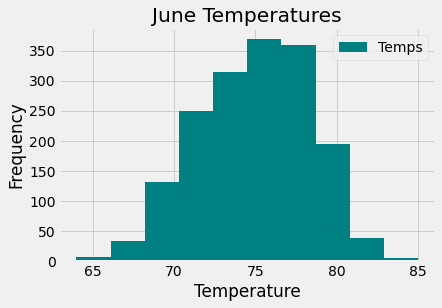

In [162]:
# HISTOGRAMS | JUNE TEMP
june_hist_df.plot.hist(bins= 10, color="teal")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("June Temperatures")
plt.show()

In [164]:
# HISTOGRAMS | DECEMBER TEMP

dec_hist_df = pd.DataFrame(december_temps, columns=["Date", "Temperatures"])
dec_hist_df

,Date,Temperatures
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [165]:
dec_hist_df.drop(["Date"], axis = 1)

,Temperatures
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


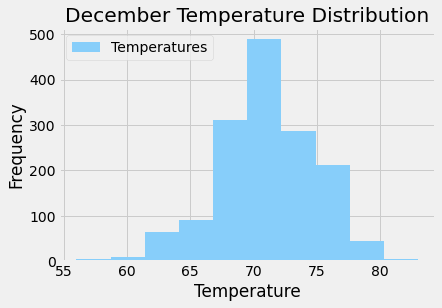

In [170]:
# HISTOGRAMS | DECEMBER TEMP CONT

dec_hist_df.plot.hist(bins=10, color="lightskyblue")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("December Temperature Distribution")
plt.show()

In [175]:
# Looking at all available recordings of preciptiation > 0 vis-a-vis total recordings

all_recordings = session.query(Measurement.date, Measurement.prcp).all()
all_recordings

# 19550 dates (before NaNs)

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [187]:
all_recordings_df = pd.DataFrame(all_recordings, columns=["Date", "Precipitation"])
all_recordings_df.head()

,Date,Precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


In [191]:
all_df= all_recordings_df.dropna(subset=["Precipitation"])

In [192]:
all_df

,Date,Precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
5,2010-01-07,0.06
...,...,...
19543,2017-08-17,0.13
19545,2017-08-19,0.09
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [195]:
all_df = all_df[all_df["Precipitation"] > 0]
all_df

,Date,Precipitation
0,2010-01-01,0.08
5,2010-01-07,0.06
9,2010-01-11,0.01
21,2010-01-24,0.01
23,2010-01-26,0.04
...,...,...
19543,2017-08-17,0.13
19545,2017-08-19,0.09
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [196]:
all_df.describe()


,Precipitation
count,9918.000000
mean,0.293217
std,0.601825
min,0.010000
25%,0.030000
50%,0.090000
75%,0.290000
max,11.530000
